# Исследование данных о продажах компьютерных игр


Краткий план работы:
1. Изучить общую информацию.
2. Подготовить данные, преобразовав типы и заполнив пропуски.
3. Посчитать суммарные продажи
4. Провести исследовательский анализ данных
5. Составить портрет пользователя каждого региона
6. Проверить гипотезу о средних пользовательских рейтингах:
     - H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
     - H1: Средние пользовательские рейтинги жанров Action и Sports разные.

## Изучение общей информации

In [50]:
# импорт библиотек
import pandas as pd
import missingno as msno
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
from scipy import stats
import seaborn as sns
from seaborn.widgets import plt
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px


In [2]:
data = pd.read_csv('datasets/games_sales_data_research.csv')

In [3]:
# общая информация
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# проверка уникальных значений в столбце с оценкой пользователей
data['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [5]:
# считаем пропуски
data.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

<Axes: >

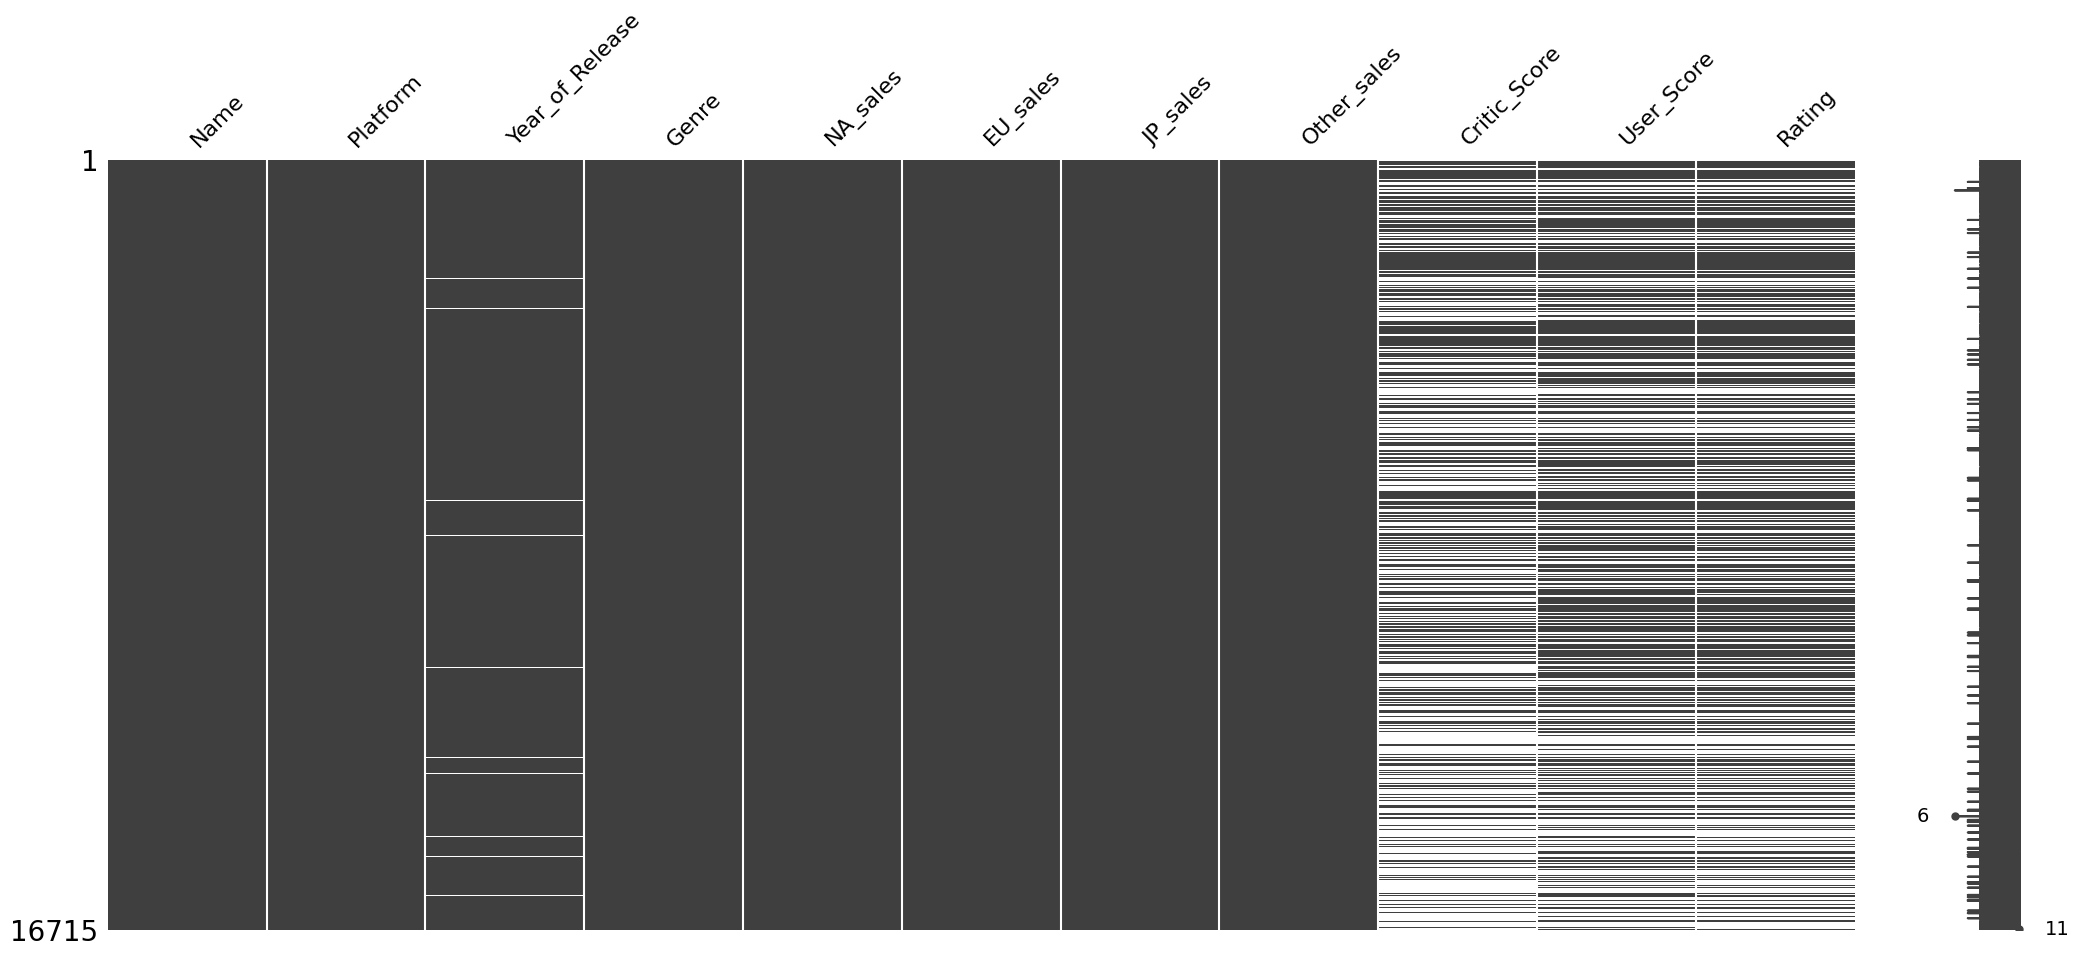

In [6]:
msno.matrix(data)

**Вывод**

При изучении общей информации о датафрейме выявлено следующее:
 - названия столбцов в разных регистрах
 - тип данных в столбце с годом релиза тип данных `float64` , что странно для обозначения года
 - тип данных в столбце с оценкой пользователей `object`, а согласно описанию данных оценка пользователей происходила по шкале от 1 до 10. Проверка уникальных значений показала, что кроме численных оценок, есть показатель **`tbd`** ("To Be Determined" (подлежит уточнению) или "To Be Decided" (подлежит решению), то есть не определена окончательная пользовательская оценка). Поскольку значение не представляет собой числовую оценку оно не может быть использовано для вычислений или агрегации. На этапе переработки заменим такие значения на NaN.
 - в столбцах с оценками критиков и пользователей довольно много пропусков, 8578 и 6701 соответственно.

## Переработка данных

### Замена названий столбцов

In [7]:
# приведем названия к нижнему регистру
data.columns = data.columns.str.lower()

### Преобразование данных в нужные типы и обработка пропусков

#### Колонка с годом релиза

Во время изучения общей информации было выяснено что пропусков в данной колонке 269 из 16715 строк во всей таблице. Это меньше двух процентов, принимаем решение строки с пропусками удалить и привести данные к целочисленному типу.

In [8]:
# удаляем пропуски
data = data.dropna(subset=['year_of_release']).reset_index(drop=True)

In [9]:
# меняем тип данных
data['year_of_release'] = data['year_of_release'].astype(int)

In [10]:
# проверка
data['year_of_release'].isnull().sum()

np.int64(0)

In [11]:
data['year_of_release'].dtype

dtype('int64')

#### Колонка с названиями игр

In [12]:
# смотрим строки с пропусками
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
652,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14022,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Принимаем решение удалить

In [13]:
# удаляем
data = data.dropna(subset=['name']).reset_index(drop=True)

#### Колонка с пользовательской оценкой

In [14]:
# замена нечисловых значений на NaN
data.loc[data['user_score'] == 'tbd', 'user_score'] = float('nan')

In [15]:
# приведение к типу float
data['user_score'] = data['user_score'].astype(float)

In [16]:
# проверка
data['user_score'].dtype

dtype('float64')

#### Колонка с рейтингом

Согласно описанию данных рейтинг составлен организацией [ESRB](https://www.esrb.org/ratings-guide/). Эта ассоциация определяет рейтинг компьютерных игр, присваивает подходящую возрастную категорию и присваевает им следующие категории:
- EC (Early Childhood - Для детей младшего возраста)
- E (Everyone - Для всех)
- E10+ (Everyone 10 and Older - Для всех от 10 лет и старше)
- T (Teen - Подросткам)
- M (Mature - Для взрослых)
- AO (Adults Only - Только для взрослых)
- RP (Rating Pending - Рейтинг ожидается)


In [17]:
# проверка значений на соответствие данным с сайта ESRB
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

"K-A" (Kids to Adults - Для детей и взрослых) использовался ранее и был заменен рейтингом "E" (Everyone - Для всех).
Заменим K-A на E, а пропуски заполним значением `undefined`

In [18]:
data['rating'] = data['rating'].replace('K-A', 'E')
data['rating'] = data['rating'].fillna(value='undefined')

In [19]:
# проверяем
data['rating'].unique()

array(['E', 'undefined', 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

#### Дубликаты

In [20]:
data.duplicated().sum()

np.int64(0)

### Подсчет суммарных продаж

Посчет продаж во всех регионах и запись их в отдельный столбец.

In [21]:
data['sales'] = data[['eu_sales', 'jp_sales', 'na_sales', 'other_sales']].sum(axis=1)

In [22]:
# проверяем
data.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54


**Вывод**

На этапе переработки данных:
- приведены к нижнему регистру названия столбцов,
- удалены пропуски (по причине малочисленности) и изменен тип данных в столбце `year_of_release`,
- после проверки пропускв в столбце `name` удалены две строки, так как на общую статичтическую картину они не повлияют,
- приведение данных столбца к типу `float` позволит в дальнейшем исследовании удобно ими оперировать,
- в столбце `rating` заменены названия устаревших значений на актуальные и заполнены пропуски,
- посчитаны и добавлены к таблице в виде отдельного столбца суммарные продажи по всем регионам.
- 
Предположения о возникновении пропусков:
- Название игры - пропуски в столбце Name могут возникнуть из-за ошибок в данных или технических проблем при сборе данных. Например, название игры могло быть неизвестным или неопределенным на момент сбора данных.
- Год релиза - некоторые игры могли быть выпущены до того, как начали собирать такие данные, или из-за ошибок в сборе данных.
- Жанр - информация о жанре игры не была доступна или не была заполнена при сборе данных.
- Оценка критиков - игра не получила оценку критиков или если эта информация не была доступна на момент сбора данных. Также могут быть ошибки в данных.
- Пользовательская оценка - информация о пользовательской оценке игры отсутствует или не была заполнена. Это также может быть связано с отсутствием данных или ошибками.
- Рейтинг ESRB - информация о рейтинге ESRB отсутствует в данных или не была заполнена. Некоторые игры могут не иметь официального рейтинга, или эта информация могла быть утеряна.

## Исследовательский анализ

### Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

Построим график с количеством релизов по годам

In [23]:
fig = px.line(data.groupby('year_of_release')['name'].count().reset_index(), x="year_of_release", y="name")
fig.update_xaxes(title="Год релиза")
fig.update_yaxes(title="Количество релизов")
fig.show()

Пиковые значения приходятся на 2008 год, начиная с 2000 года резкое увеличение количества релизов приходящее к пику.

Выведем топ по годам

In [24]:
# группируем по году
top_years = data.groupby('year_of_release')['name'].count().sort_values(ascending=False).head(50).reset_index()
# строим барплот
fig = px.bar(top_years, x='year_of_release', y='name', text='name')
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_xaxes(title="Год релиза")
fig.update_yaxes(title="Количество релизов")
fig.show()



Данные за период 1980 - 1994 гг. можно считать не важными поскольку релизов выходило менее ста в год.
На рост после 1994 года возможно повлияло широкое распространение и появление разнообразия гаджетов .

### Продажи по платформам.

Выберем платформы с наибольшими суммарными продажами и распределим по годам.

In [25]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [26]:
# смотрим количество представленных платформ
data['platform'].nunique()

31

In [27]:
# группировка по платформам и годам, суммируем продажи
sales_by_platform = data.groupby(['platform', 'year_of_release'])['sales'].sum().reset_index()

# топ-10 платформ с максимальными продажами
top_platforms = sales_by_platform.groupby('platform')['sales'].sum().nlargest(10).index

# фильтруем
top_platform_sales = sales_by_platform[sales_by_platform['platform'].isin(top_platforms)]

In [28]:
# строим график
fig = px.line(top_platform_sales, x='year_of_release', y='sales', color='platform', title='Изменение продаж по платформам')
fig.update_xaxes(title="Год выпуска")
fig.update_yaxes(title="Продажи, мир")
fig.show()

Кривые по продажам всех плтформ выглядят нормально, кроме кривой по продажам игр на платформе Nintendo DS. [Данная платформа](http://ru.wikipedia.org/wiki/Nintendo%20DS) как и игры для нее вышли в 2004 году.



In [29]:
# поиск по продажам в интервале 1985-2004 гг
data[(data['platform'] == 'DS') & (data['year_of_release'] >= 1985) & (data['year_of_release'] <= 2003)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
15704,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,undefined,0.02


В данных ошибка так как [игра](https://www.igromania.ru/game/4890/Saikyou_Toudai_Shougi_DS.html) вышла 10 мая 2007 года

In [30]:
#заменим год на правильный
data.loc[15704, 'year_of_release'] = 2007

In [31]:
# перегруппируем данные с учетом замены
# группировка по платформам и годам, суммируем продажи
sales_by_platform = data.groupby(['platform', 'year_of_release'])['sales'].sum().reset_index()

# топ-10 платформ с максимальными продажами
top_platforms = sales_by_platform.groupby('platform')['sales'].sum().nlargest(10).index

# фильтруем
top_platform_sales = sales_by_platform[sales_by_platform['platform'].isin(top_platforms)]

In [32]:
# строим обновленный график
fig = px.line(top_platform_sales, x='year_of_release', y='sales', color='platform', title='Изменение продаж по платформам')
fig.update_xaxes(title="Год выпуска")
fig.update_yaxes(title="Продажи, мир")
fig.show()

Первые три позиции заняли игровые консоли
 За какой характерный срок появляются новые и исчезают старые платформы?
Судя по графику средняя продолжительность жизни платформы 7-8 лет (отметим, что это список из топ-10 по суммарным продажам, а не весь срез из 31 платформы имеющихся в сете).

### Актуальный период

Актуальным периодом для работы с данными и прогноза на 2017 год, выберем интервал 2013 - 2016 гг

In [33]:
act_data = data[(data['year_of_release'] >= 2013) & (data['year_of_release'] <= 2016)]

### Какие платформы лидируют по продажам, растут или падают?

In [34]:
platform_sales = act_data.groupby('platform')['sales'].sum().reset_index()

# cортируем результаты по убыванию продаж и выбираем топ-5 платформ
top_platforms = platform_sales.sort_values(by='sales', ascending=False).head(10)

fig = px.bar(top_platforms, x='platform', y='sales', text='sales',
             labels={'platform': 'Платформа', 'sales': 'Продажи'},
             title='Продажи по платформам')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

fig.show()

В лидерах консоли PlayStation 4 и 3 поколений и консоль Xbox One

Посмотрим рост\падение

In [35]:
# группируем данные по платформам и годам и суммируем продажи
platform_year_sales = act_data.groupby(['platform', 'year_of_release'])['sales'].sum().reset_index()

fig = px.line(platform_year_sales, x='year_of_release', y='sales', color='platform',
              labels={'year_of_release': 'Год релиза', 'sales': 'Продажи (млн. копий)', 'platform': 'Платформа'},
              title='Кривая продаж по платформам в разные годы (после 2013 года)')
fig.show()

Выберите несколько потенциально прибыльных платформ.

Потенциально прибыльными платформами можно выбрать Xbox One, PlayStatoin 4

### Построение боксплота и описание данных

C:\Users\alexei_marganov\AppData\Local\Temp\ipykernel_17240\2338971467.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




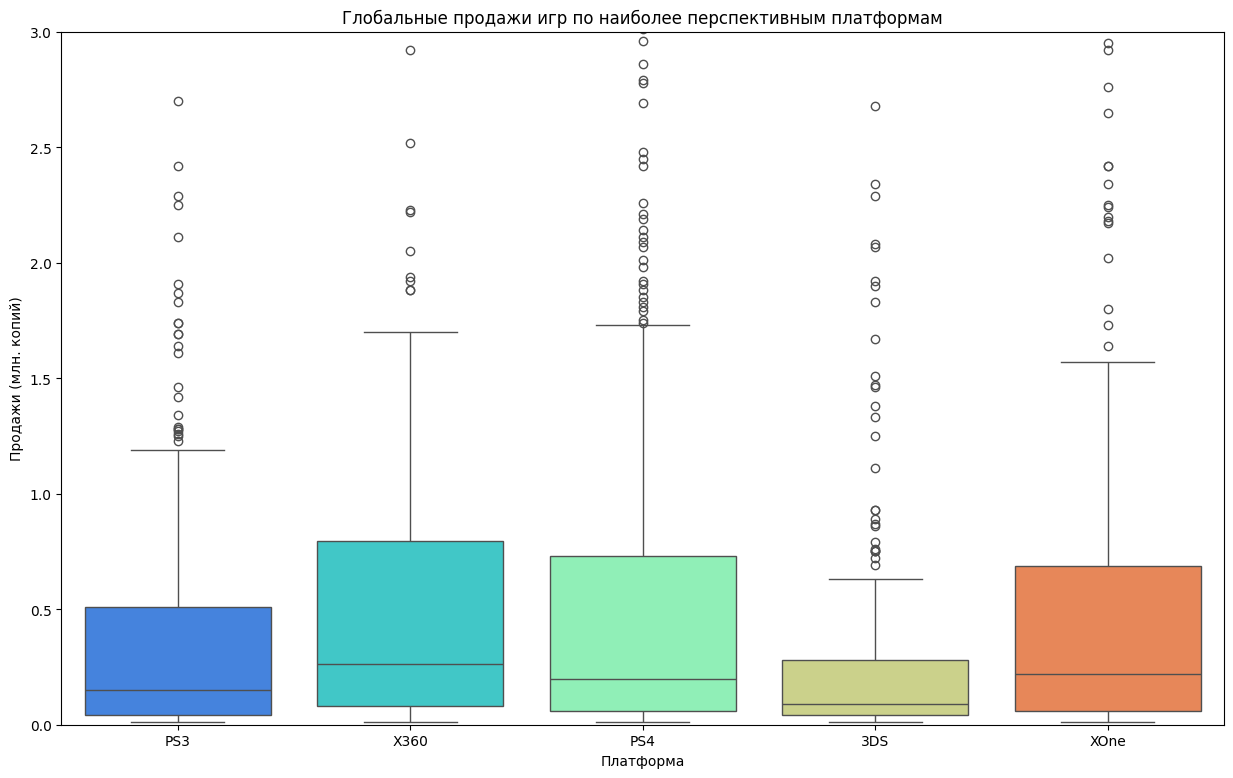

In [36]:
# суммируем продажи для платформ за актуальный период
platform_sales = act_data.groupby('platform')['sales'].sum().reset_index()

# сортируем в убывающем порядке
top_platforms = platform_sales.sort_values(by='sales', ascending=False)['platform'].head(5)

# фильтруем
act_data_top_platforms = act_data[act_data['platform'].isin(top_platforms)]

# строим ящик с усами
fig = plt.subplots(figsize=(15,9))
plt.title("Глобальные продажи игр по наиболее перспективным платформам")
plot = sns.boxplot(x="platform", y="sales", data=act_data_top_platforms, palette='rainbow')
plt.ylim(0, 3)
plt.xlabel('Платформа')
plt.ylabel('Продажи (млн. копий)')
plt.show()

C:\Users\alexei_marganov\AppData\Local\Temp\ipykernel_17240\3507751902.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




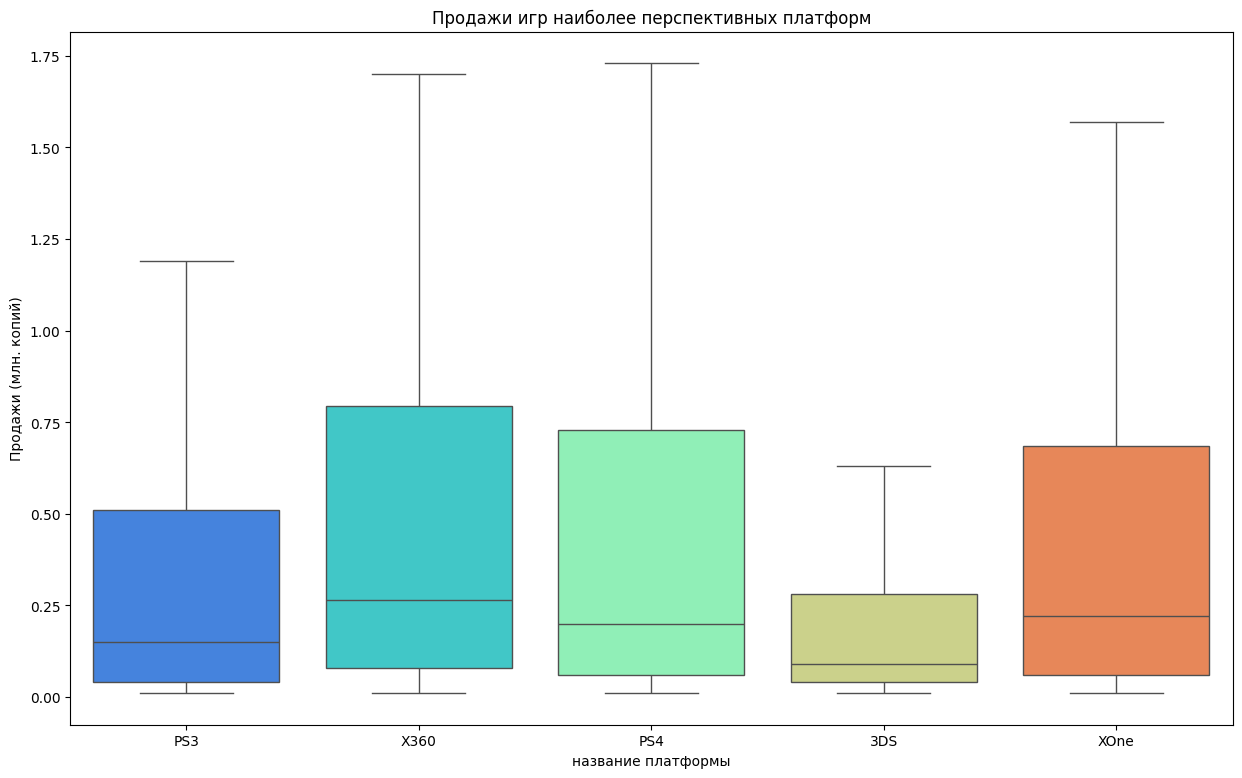

In [37]:
# строим боксплоты без выбросов
fig = plt.subplots(figsize=(15,9))
plt.title('Продажи игр наиболее перспективных платформ')
plot = sns.boxplot(x="platform", y="sales", data=act_data_top_platforms, palette='rainbow', showfliers=False)
plt.xlabel('название платформы')
plt.ylabel('Продажи (млн. копий)')
plt.show()

У всех платформ медианы меншье чем среднее. Разброс у портативных PlayStation Vita и PlayStation Portable маленький.

### Влияние на продажи внутри одной популярной платформы отзывы пользователей и критиков.

Возьмем в работу PlayStation 4

In [38]:
# фильтруем данные для платформы PS4 и выберите нужные столбцы
ps4_data = act_data[act_data['platform'] == 'PS4'][['sales', 'critic_score', 'user_score']]

# создаем график
fig = px.scatter_matrix(ps4_data)

fig.update_traces(marker=dict(size=3), diagonal_visible=False)
fig.update_layout(title="Диаграмма рассеяния для продаж, оценок критиков и оценок пользователей на платформе PS4")
fig.show()


In [39]:
ps4_data.corr()

,sales,critic_score,user_score
sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


- Оценки пользователей на продажи не влияют. Видимо потому что пользователь выставляет оценку уже по факту покупки.
- Оценки критиков на продажи влияют
- Рост продаж наблюдается при оценках критиков выше 60

Возьмем три платформы:
- PS3
- X360
- XOne

In [40]:
# фильтруем датафрейм для выбранных платформ
sel_platforms = ['PS3', 'X360', 'XOne']
filtered_data = data[data['platform'].isin(sel_platforms)]

# диаграмма рассеяния для продаж и оценок критиков
fig1 = px.scatter(filtered_data, x='critic_score', y='sales', color='platform', title='Диаграмма рассеяния продаж от оценок критиков')
fig1.update_traces(marker=dict(size=5), opacity=0.7)
fig1.update_layout(xaxis_title='Оценка критиков', yaxis_title='Продажи (млн. копий)')

# диаграмма рассеяния для продаж и оценок пользователей
fig2 = px.scatter(filtered_data, x='user_score', y='sales', color='platform', title='Диаграмма рассеяния продаж от оценок пользователей')
fig2.update_traces(marker=dict(size=5), opacity=0.7)
fig2.update_layout(xaxis_title='Оценка пользователей', yaxis_title='Продажи (млн. копий)')

fig1.show()
fig2.show()


Выводы по этим платформам соотносятся с выводами по платформе PS4

### Общее распределение игр по жанрам. Самые прибыльные жанры. Выделение ли жанров с высокими и низкими продажами.

In [41]:
genre_distribution = act_data['genre'].value_counts().reset_index()
genre_distribution.columns = ['genre', 'count']

fig = px.bar(genre_distribution, x='genre', y='count', title='Распределение игр по жанрам')
fig.update_xaxes(categoryorder='total ascending')  # cорт по количеству игр
fig.update_traces(text=genre_distribution['count'], textposition='outside')
fig.show()

In [42]:
genre_sales = act_data.groupby('genre')['sales'].sum().reset_index()
top_genre_sales = genre_sales.sort_values(by='sales', ascending=False)

fig = px.bar(top_genre_sales, x='genre', y='sales', title='Самые прибыльные жанры')
fig.update_xaxes(categoryorder='total descending')
fig.update_traces(text=top_genre_sales['sales'], textposition='outside')

fig.show()

In [43]:
genre_distribution.columns = ['genre', 'count']

# средние продажи по жанрам
genre_mean_sales = act_data.groupby('genre')['sales'].mean().reset_index()
top_genre_mean_sales = genre_mean_sales.sort_values(by='sales', ascending=False)

fig = px.bar(top_genre_mean_sales, x='genre', y='sales', title='Средние продажи по жанрам')

fig.show()

В явных лидерах по продажам четыре жанра:
- Action
- Shooter
- Sports
- RPG

Три из них так же и в лидерах по количеству релизов:
- Action
- Sports
- RPG

Интересно, что игры жанра Adventure по количеству релизов на третьем месте, а по продажам лишь на девятом.

Шутеры с их немногочисленностью по релизам, идут на первом месте по средним.

Самый многочисленный и прибыльный суммарно экшн, лишь седьмой.

## Определение портрета пользователя

### Самые популярные платформы (топ-5). Опишите различия в долях продаж.

In [44]:
# группируем данные
sales_eu = act_data.groupby('platform')['eu_sales'].agg(eu_sales='sum').nlargest(5, 'eu_sales').reset_index()
sales_na = act_data.groupby('platform')['na_sales'].agg(na_sales='sum').nlargest(5, 'na_sales').reset_index()
sales_jp = act_data.groupby('platform')['jp_sales'].agg(jp_sales='sum').nlargest(5, 'jp_sales').reset_index()

# строим барплот
fig = make_subplots(rows=1, cols=3, shared_yaxes=True,
                    subplot_titles=('Северная Америка', 'Европа', 'Япония'))


fig.add_trace(go.Bar(x=sales_na['platform'], y=sales_na['na_sales'], name='Северная Америка', text=sales_na['na_sales']), row=1, col=1)
fig.add_trace(go.Bar(x=sales_eu['platform'], y=sales_eu['eu_sales'], name='Европа', text=sales_eu['eu_sales']), row=1, col=2)
fig.add_trace(go.Bar(x=sales_jp['platform'], y=sales_jp['jp_sales'], name='Япония', text=sales_jp['jp_sales']), row=1, col=3)

fig.update_layout(title_text='Продажи по платформам по странам', width=1100, height=500)
fig.update_traces(textposition='outside')
fig.show()

В Северной Америке и в Европе в лидерах консоль PlayStation 4, в Японии - портативная Nintendo 3DS,

### Самые популярные жанры (топ-5).

In [45]:
# группируем данные
genres_eu = act_data.groupby('genre')['eu_sales'].agg(eu_sales='sum').nlargest(5, 'eu_sales').reset_index()
genres_na = act_data.groupby('genre')['na_sales'].agg(na_sales='sum').nlargest(5, 'na_sales').reset_index()
genres_jp = act_data.groupby('genre')['jp_sales'].agg(jp_sales='sum').nlargest(5, 'jp_sales').reset_index()

# строим барплот
fig = make_subplots(rows=1, cols=3, shared_yaxes=True,
                    subplot_titles=('Северная Америка', 'Европа', 'Япония'))

fig.add_trace(go.Bar(x=genres_na['genre'], y=genres_na['na_sales'], name='Северная Америка',
                     text=genres_na['na_sales']), row=1, col=1)
fig.add_trace(go.Bar(x=genres_eu['genre'], y=genres_eu['eu_sales'], name='Европа',
                     text=genres_eu['eu_sales']), row=1, col=2)
fig.add_trace(go.Bar(x=genres_jp['genre'], y=genres_jp['jp_sales'], name='Япония',
                     text=genres_jp['jp_sales']), row=1, col=3)

fig.update_layout(title_text='Продажи по жанрам в разрезе стран', width=1100, height=500)
fig.update_traces(textposition='outside')
fig.show()

Картина для Северной Америки и Европы практически одинакова, лидер Action (может быть обусловлено тем, что Action включает в себя множество поджанров) далее убывание происходит равномерно.
В Японии с сильным отрывом уходят RPG и Actoin


### Влияние рейтинга ESRB на продажи в отдельном регионе

[Рейтинги ESRB](https://www.esrb.org/ratings-guide/):
- "EC" (Early Childhood) - "Для детей младшего возраста": Игра подходит для детей младшего возраста (обычно до 6 лет) и не содержит материалов, которые могли бы быть вредными.

- "E" (Everyone) - "Для всех": Игра подходит для всех возрастов и не содержит материалов, которые могли бы быть вредными.

 -"E10+" (Everyone 10 and older) - "Для всех от 10 лет и старше": Игра подходит для детей от 10 лет и старше. Она может содержать незначительное насилие, мягкий юмор или минимальную степень азартных игр.

- "T" (Teen) - "Подросткам": Игра подходит для подростков от 13 лет и старше. Она может содержать насилие, нецензурную речь или минимальные сцены сексуального характера.

- "M" (Mature) - "Для взрослых": Игра предназначена для взрослых от 17 лет и старше. Она может содержать интенсивное насилие, жестокие сцены, сильный язык и материалы сексуального характера.

- "AO" (Adults Only) - "Только для взрослых": Игра предназначена только для взрослых старше 18 лет и может содержать сексуальный контент и другие материалы, которые не подходят для подростков.

- "RP" (Rating Pending) - "Рейтинг в ожидании": Этот символ указывает на то, что игра еще не была оценена ESRB, и рейтинг ожидается.

In [46]:
# диаграмма потребителей из Европы
esrb_eu = act_data.groupby('rating')['eu_sales'].agg(eu_sales='sum').reset_index()

fig_eu = px.pie(names=esrb_eu['rating'], values=esrb_eu['eu_sales'], title='Европа')
fig_eu.show()

In [47]:
# диаграмма потребителей из Северной Америки
esrb_na = act_data.groupby('rating')['na_sales'].agg(na_sales='sum').reset_index()

fig_na = px.pie(names=esrb_na['rating'], values=esrb_na['na_sales'], title='Северная Америка')
fig_na.show()

In [48]:
# диаграмма потребителей из Японии
esrb_jp = act_data.groupby('rating')['jp_sales'].agg(jp_sales='sum').reset_index()

fig_jp = px.pie(names=esrb_jp['rating'], values=esrb_jp['jp_sales'], title='Япония')
fig_jp.show()

 - Для рынков Европы и Северной Америки рейтинги распределились с крайне схожими долями.
 - В Японии больше популярны игры для подростков. Отсутствие у более чем половины игр рейтинга обуслвлено тем, что в Японии есть своя национальная организация присваевающая рейтинги играм CERO (Computer Entertainment Rating Organization) или организация оценки компьютерных развлечений.

### Итог

Портрет пользователя из Европы и Северной Америки:
- Любит игры жанров Action и Shooter, с большой долей вероятности будет использовать для игр консоль PlayStation 4 поколения, если будет использована портативная платформа, то ей окажется Nintendo 3DS, если ориентироваться на рейтинг, то пользователь окажется скорее взрослым или подростком и менее вероятно, что ребенком.
Портрет пользователя из Японии:
- Любитель портативной консоли Nintendo 3DS, играющий в RPG и Action игры с рейтингом для подростков.

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

 > H0: Средние пользовательские рейтинги платформ Xbox One и PC равны

 > H1: Средние пользовательские рейтинги платформ Xbox One и PC не равны

Как формклировались гипотезы:

 - Нулевая гипотеза предполагает отсутствие различий между средними пользовательскими рейтингами для платформ Xbox One и PC, в то время как альтернативная гипотеза предполагает наличие различий между ними.

Критерии выбора для проверки гипотез:
 - числовые данные в виде пользовательских рейтингов,
 - наличие двух независимых выборок - пользовательские рейтинги для платформ Xbox One и PC,
 - есть две группы и нужно опредилить наличие статистически значимых различий между ними.

Для проверки гипотез проведем t-test для независимых выборок

In [52]:
# выделяем выборки пользовательских рейтингов для платформ Xbox One и PC
xbox_one_ratings = act_data[act_data['platform'] == 'XOne']['user_score'].dropna()
pc_ratings = act_data[act_data['platform'] == 'PC']['user_score'].dropna()

# проводим t-тест
t_stat, p_value = stats.ttest_ind(xbox_one_ratings, pc_ratings, equal_var=False)

# уровень значимости
alpha = 0.05

# результаты
print("p-значение:", p_value)

if p_value < alpha:
    print("Отвергаем нулевую гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC не равны.")
else:
    print("Не отвергаем нулевую гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC равны.")

p-значение: 0.14759594013430463
Не отвергаем нулевую гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC равны.


### Вывод

Мы не отвергаем нулевую гипотезу (H0), которая утверждает, что средние пользовательские рейтинги платформ Xbox One и PC равны. Это означает, что на основе имеющихся данных у нас нет статистически значимых доказательств в пользу того, что пользовательские рейтинги различаются между этими двумя платформами.

Таким образом, на основе проведенного анализа данных, мы не можем сделать вывод о наличии различий в пользовательских рейтингах между платформами Xbox One и PC.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

 > H0: Средние пользовательские рейтинги жанров Action и Sports равны.

 > H1: Средние пользовательские рейтинги жанров Action и Sports различаются.

Как формулировались гипотезы:
 - нулевая гипотеза предполагает, что нет различий между средними пользовательскими рейтингами для жанров Action и Sports, а альтернативная гипотеза утверждает, что такие различия существуют.

Критерии выбора для проверки гипотез:
 - числовые данные в виде пользовательских рейтингов,
 - наличие двух независимых выборок - пользовательские рейтинги для жанров Action и Sports,
 - есть две группы и нужно опредилить наличие статистически значимых различий между ними.

Для проверки гипотез проведем t-test для независимых выборок

In [53]:
# данные Action
action_user_scores = act_data[act_data['genre'] == 'Action']['user_score']

# данные Sports
sports_user_scores = act_data[act_data['genre'] == 'Sports']['user_score']

# t-тест
t_stat, p_value = stats.ttest_ind(action_user_scores, sports_user_scores, nan_policy='omit')

alpha = 0.05

# результаты
print("p-значение:", p_value)

if p_value < alpha:
    print("Отвергаем нулевую гипотезу: Средние пользовательские рейтинги жанров Action и Sports различаются.")
else:
    print("Не отвергаем нулевую гипотезу: Средние пользовательские рейтинги жанров Action и Sports равны.")

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу: Средние пользовательские рейтинги жанров Action и Sports различаются.


**Вывод**

По результатам проведенного t-теста, получено очень маленькое p-значение, которое намного меньше выбранного уровня значимости. Это говорит о том, что мы отвергаем нулевую гипотезу.

Таким образом, на основе анализа данных, у нас есть статистически значимые доказательства того, что средние пользовательские рейтинги жанров Action и Sports различаются.

**Вывод по исследованию**

Нам были предоставлены данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Изучена общая информация, преобразованы данные (названия колонок, тип данных в колонках, удалены данные не имеющие статистической ценности, обновлены данные в колонке с рейтингом от ESRB, проведена проверка дубликатов).

Было выявлено, что количество релизов игр начинает резки рост после 2000 года и падением после 2012 года.
Игровые консоли PS3, PS2, PS4, X360, XOne занимали лидирующие позиции на протежении истории, менее популярными были портативные платформы PSVita, Wii, 3DS.

Срок жизни консоли примерно 8 лет.

Самыми популярными жанрами оказались Action, Shooter, RPG. Интересно получилось с жанром Advetures, при большом показателе по количеству релизов, продаж было немного.

Пользовательские портреты по Северной Америке и Европе очень схожи. Любовь к консоли PS4 и жанрам игр для людей взрослых. В Японии популярнее портативная консоль 3DS и жанрам для подростков.

Проверена и не отвергнута гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Проверена и отвергнута гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports разные.
